In [18]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [19]:
start_date = '2021-1-1'
history_map = {}
for symbol in ['SMH','USD','SOXL','QQQ','TQQQ','NVDA','FNGU','FNGS','MAGS','MAGX','MAG7.L','NVD3.L','QQQ5.L','IYW','IGM']:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

SMH history: 191w
USD history: 191w
SOXL history: 191w
QQQ history: 191w


TQQQ history: 191w
NVDA history: 191w
FNGU history: 191w
FNGS history: 191w
MAGS history: 72w
MAGX history: 26w
MAG7.L history: 20w
NVD3.L history: 191w
QQQ5.L history: 142w
IYW history: 191w
IGM history: 191w


In [20]:
rows = []
for symbol in history_map:
    history = history_map[symbol]
    C2L = (history['Low'].shift(-1) / history['Close'] - 1) * 100
    rows.append({
        'symbol': symbol,
        'C2L 25%': C2L.quantile(0.25),
        'C2L 50%': C2L.quantile(0.5),
        'C2L 75%': C2L.quantile(0.75),
    })
C2L = pd.DataFrame(rows)
print(C2L)

    symbol    C2L 25%    C2L 50%   C2L 75%
0      SMH  -4.601076  -2.619487 -0.925164
1      USD -10.124542  -5.570400 -1.789293
2     SOXL -14.311601  -8.198495 -3.158605
3      QQQ  -2.903977  -1.515096 -0.589466
4     TQQQ  -8.842314  -4.480033 -1.875374
5     NVDA  -7.165209  -3.452334 -1.200304
6     FNGU -12.799467  -7.885783 -2.412320
7     FNGS  -4.200391  -2.547593 -0.704993
8     MAGS  -2.523938  -1.486318 -0.413362
9     MAGX  -6.472914  -2.473281 -0.813006
10  MAG7.L -21.647565  -9.721402 -3.724081
11  NVD3.L -20.701103 -10.724407 -4.286022
12  QQQ5.L -15.989042  -8.003715 -1.000185
13     IYW  -3.248698  -1.709768 -0.703891
14     IGM  -3.405422  -1.613699 -0.504636


In [21]:
# Plot median stock change over number of weeks
max_weeks = 26
df = pd.DataFrame()


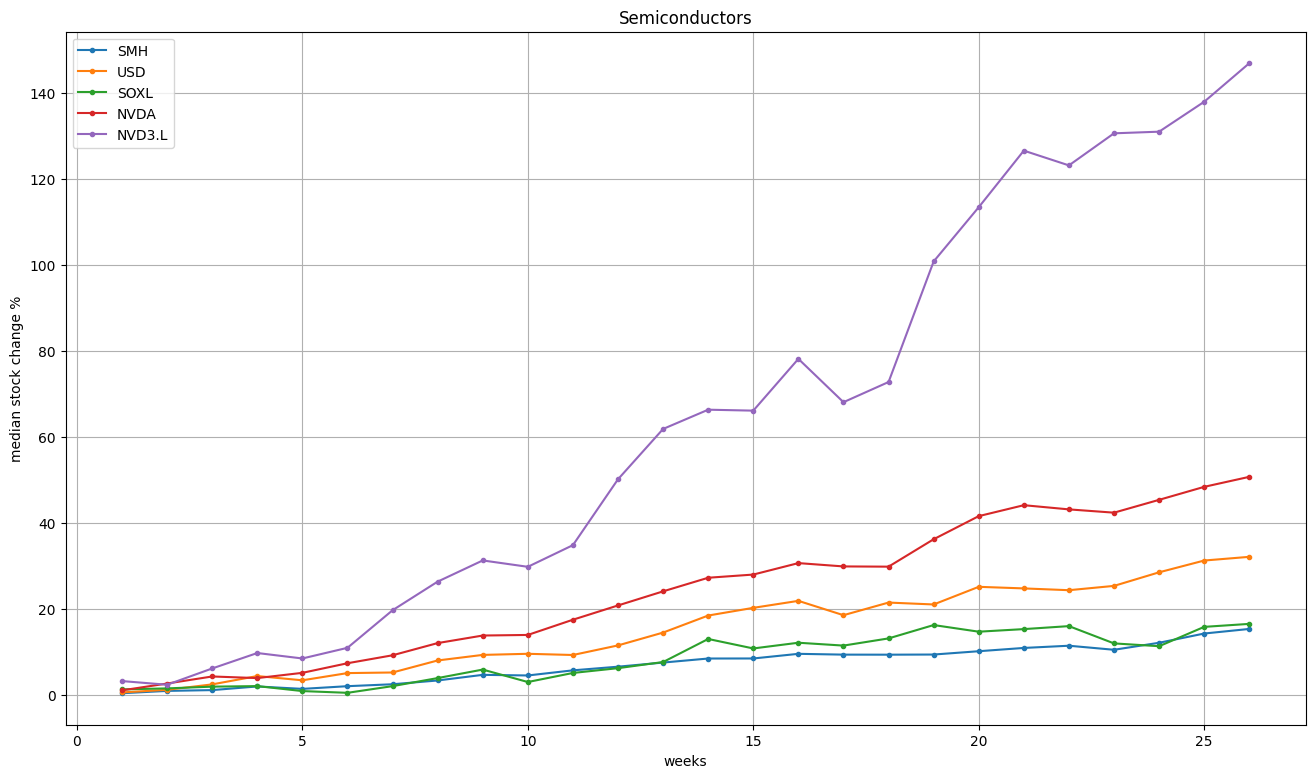

In [22]:
symbols = ['SMH','USD','SOXL','NVDA','NVD3.L']
for symbol in symbols:
    history = history_map[symbol]
    stock_change_median = [None]
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            stock_change_median.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            stock_change_median.append(stock_changes.median())
    # plt.plot(stock_change_median, label=symbol, marker='.')
    df[symbol] = stock_change_median

df[symbols].plot(figsize=(16,9), marker='.')
plt.legend()
plt.title('Semiconductors')
plt.xlabel('weeks')
plt.ylabel('median stock change %')
plt.grid()


In [23]:
print(f'USD:SMH {(df.USD / df.SMH).median():.1f}')
print(f'NVD3.L:NVDA {(df["NVD3.L"] / df.NVDA).median():.1f}')

USD:SMH 2.2
NVD3.L:NVDA 2.4


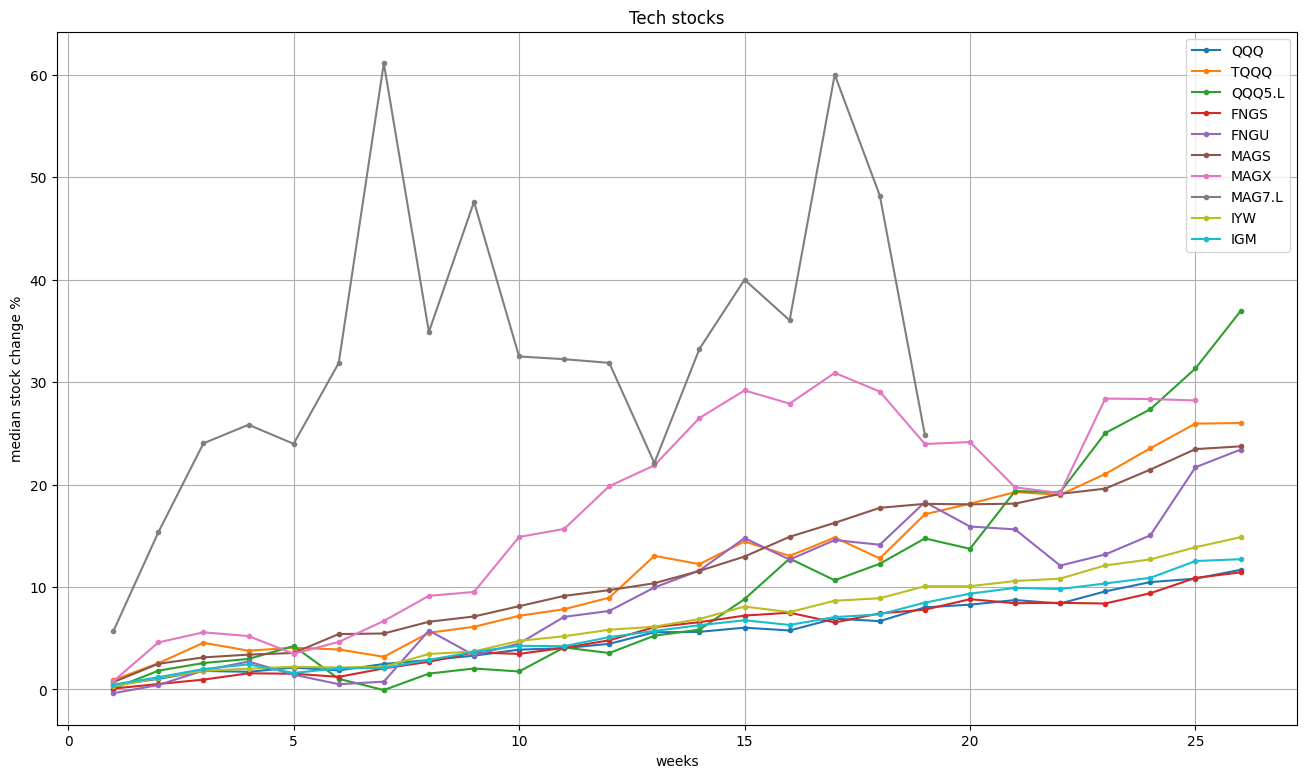

In [26]:
symbols = ['QQQ','TQQQ','QQQ5.L','FNGS','FNGU','MAGS','MAGX','MAG7.L','IYW','IGM']
for symbol in symbols:
    history = history_map[symbol]
    stock_change_median = [None]
    for weeks in range(1, max_weeks+1):
        if len(history) <= weeks:
            stock_change_median.append(None)
        else:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            stock_change_median.append(stock_changes.median())
    df[symbol] = stock_change_median

df[symbols].plot(figsize=(16,9), marker='.')
plt.legend()
plt.title('Tech stocks')
plt.xlabel('weeks')
plt.ylabel('median stock change %')
plt.grid()


In [25]:
print(f'TQQQ:QQQ {(df.TQQQ / df.QQQ).median():.1f}')
print(f'QQQ5.L:QQQ {(df["QQQ5.L"] / df.QQQ).median():.1f}')
print(f'FNGU:FNGS {(df.FNGU / df.FNGS).median():.1f}')
print(f'MAGX:MAGS {(df.MAGX / df.MAGS).median():.1f}')
print(f'MAG7.L:MAGS {(df["MAG7.L"] / df.MAGS).median():.1f}')

TQQQ:QQQ 2.2
QQQ5.L:QQQ 1.6
FNGU:FNGS 1.7
MAGX:MAGS 1.4
MAG7.L:MAGS 4.0
